In [1]:
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
penguins = sns.load_dataset("penguins")

In [3]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# 1  Sample distribution
## 1.1  missing values

In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
# 종, 섬 외에 모두 결측치인 값 2개 존재
penguins.loc[penguins['sex'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [7]:
# 성별에서만 결측값 존재하는 데이터만 남겨두고, 3행 및 339행 삭제
penguins.drop([3, 339], inplace=True)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## 1.2  Categorical variables

In [8]:
# 범주형 변수 시각화 함수
def categorical(val):
  new = pd.DataFrame(penguins[val].value_counts()/penguins[val].count())
  new.reset_index(inplace=True)
  print(new)
  print("------------------------------------------")
  plt.pie(x=list(new[val]), labels=list(new['index']), autopct='%.2f%%')
  plt.show()

       index   species
0     Adelie  0.441520
1     Gentoo  0.359649
2  Chinstrap  0.198830
------------------------------------------


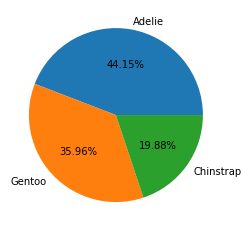

In [9]:
# 범주형 변수 1: species
categorical('species')

       index    island
0     Biscoe  0.488304
1      Dream  0.362573
2  Torgersen  0.149123
------------------------------------------


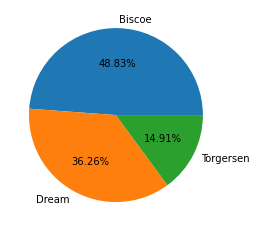

In [10]:
# 범주형 변수 2: island
categorical('island')

    index       sex
0    Male  0.504505
1  Female  0.495495
------------------------------------------


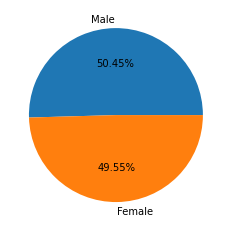

In [11]:
# 범주형 변수 3: sex
categorical('sex')

## 1.3  Numerical variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


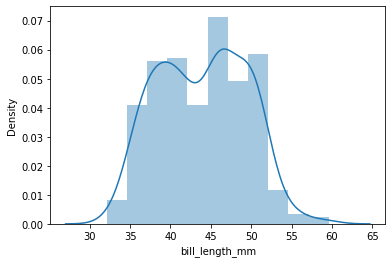

In [12]:
# 한 연속변수의 분포
sns.distplot(penguins['bill_length_mm'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


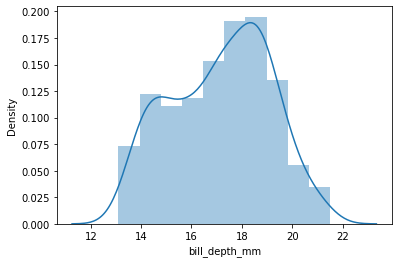

In [13]:
sns.distplot(penguins['bill_depth_mm'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


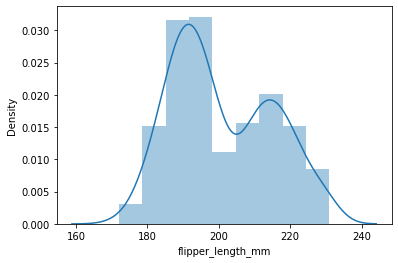

In [14]:
sns.distplot(penguins['flipper_length_mm'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


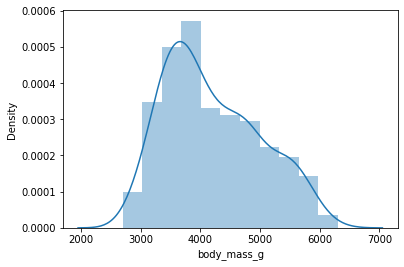

In [15]:
sns.distplot(penguins['body_mass_g'])

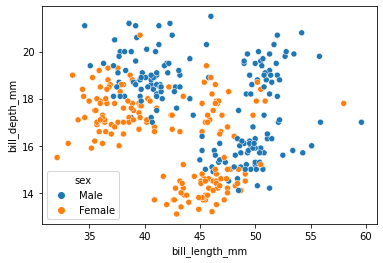

In [16]:
# 두 연속변수간의 관계
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='sex', data=penguins) 

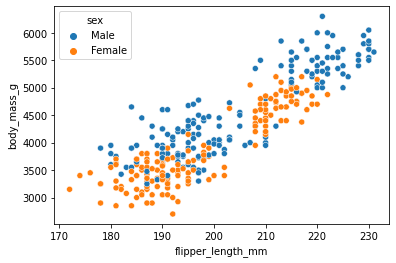

In [17]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='sex', data=penguins) 

# 2  MICE (Multiple Imputation by Chained Equations)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
# 범주형 변수 더미변환: 성별부터
penguins_test_y = penguins['sex']
penguins_dum_y = pd.get_dummies(penguins_test_y, drop_first = True, dummy_na=True)

In [20]:
for i in range(len(penguins_dum_y)):
  if penguins_dum_y.iloc[i, 1] == 1:
    penguins_dum_y.iloc[i] = np.nan
penguins_dum_y.drop(penguins_dum_y.columns[1], axis=1, inplace=True)

In [21]:
penguins_dum = pd.concat([penguins, penguins_dum_y], axis=1)

In [22]:
penguins_dum.drop(['sex'], axis=1, inplace=True)

In [23]:
# 나머지 범주형 변수 더미변환
penguins_dum = pd.get_dummies(penguins_dum, columns = ['species', 'island'], drop_first=True)

In [24]:
# 추후 추정의 편리함을 위해 자료 분리, 보존
penguins_dum_X = penguins_dum.drop(['Male'], axis=1)
penguins_test = penguins_dum

In [25]:
# 결측값을 제외한 데이터로부터 로지스틱회귀모형 훈련
# X and y after excluding missing values
X = penguins_dum.dropna(axis=0).drop(['Male'], axis=1)
y= penguins_dum.dropna(axis=0)['Male']

In [26]:
log_reg = LogisticRegression(random_state = 0)

In [27]:
log_reg_model = log_reg.fit(X, y)

In [28]:
# Prediction
y_pred = log_reg_model.predict(penguins_dum_X)

In [29]:
y_pred

array([1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0.

In [30]:
# 'y_pred' 는  2D numpy array 형태
# flatten() 메소드를 사용해서  1D array 로 전환
penguins_dum['Male'].fillna(pd.Series(y_pred.flatten()), inplace=True)

In [31]:
penguins_dum

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Male,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,1.0,0,0,0,1
1,39.5,17.4,186.0,3800.0,0.0,0,0,0,1
2,40.3,18.0,195.0,3250.0,0.0,0,0,0,1
4,36.7,19.3,193.0,3450.0,0.0,0,0,0,1
5,39.3,20.6,190.0,3650.0,1.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0.0,0,1,0,0
340,46.8,14.3,215.0,4850.0,0.0,0,1,0,0
341,50.4,15.7,222.0,5750.0,1.0,0,1,0,0
342,45.2,14.8,212.0,5200.0,0.0,0,1,0,0


In [32]:
# 로지스틱회귀 이용 결측값 추정 완료
penguins_dum.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
Male                 0
species_Chinstrap    0
species_Gentoo       0
island_Dream         0
island_Torgersen     0
dtype: int64

In [33]:
#훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [34]:
# 로지스틱 모델 학습
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

# 학습한 모델의 테스트 데이터셋에 대한 예측 결과 반환
pred = lr.predict(X_test)
y_pred_probability = lr.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [35]:
# 테스트 데이터셋에 대한 정확도, 정밀도, 특이도, f1 평가 지표 출력
print('Accuracy : %.2f' % accuracy_score(y_test, pred))
print('Precision : %.3f' % precision_score(y_test, pred))
print('Recall : %.3f' % recall_score(y_test, pred))
print('F1 : %.3f' % f1_score(y_test, pred))

Accuracy : 0.88
Precision : 0.824
Recall : 0.933
F1 : 0.875


In [36]:
# Confusion Matrix
# 결과적으로 총 8개의 값이 실제값과 예측값이 일치하지 않음
conf_mat_logistic = confusion_matrix(y_true = y_test, y_pred = pred)
print(conf_mat_logistic)

[[31  6]
 [ 2 28]]


### 변수 특성과 결측 값 유형에 따른 대체방법

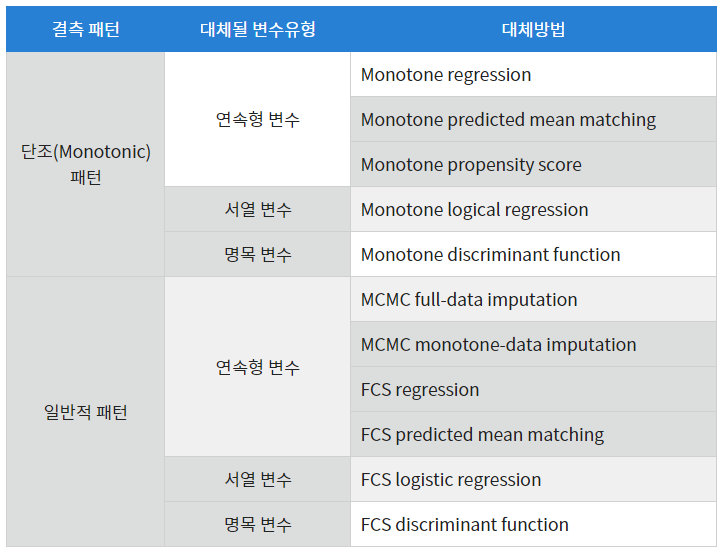

- 결측 패턴과 변수의 특성에 따라 회귀분석을 이용한 추정(Regression), 성향 점수법(Propensity score), 로지스틱 회귀분석을 이용한 추정 등을 사용

- 분포에 대한 가정 여부에 따라 정규분포를 가정하는 경우(MCMC)와 그렇지 않은 경우(FCS)로 구분

- 결측의 패턴이 단조적이고 연속형 변수의 경우, 다변량 정규분포를 가정하는 모수 방법(parameter)과 성향점수법과 같은 비모수적인 방법(non-parametric)을 모두 사용할 수 있음

  - 단조(Montonic) 패턴: 함수의 진행방향이 항상 일정한 함수 - 단조증가함수 또는 단조감소함수 등

- 단조 패턴의 서열형 변수의 경우 로지스틱 회귀분석법을 명목형 변수에는 판별 함수법 사용

- 일반적인 결측 패턴의 경우, 다변량 정규분포를 가정하는 MCMC 방법이나, 모든 변수의 결합 분포가 존재한다고 가정하는 FCS 방법을 활용할 수 있다.

- 연속형 변수에 대한 대체는 분포에 대한 가정과 상관없이 MCMC, FCS를 모두 사용할 수 있다.

- 일반적으로 MCMC가 다변량 정규분포 가정을 하고 있으나, 결측 된 정보가 크지 않은 경우, 다중 대체에 의한 추정이 강건한(robust) 결과를 보인다고 알려져 있다. 하지만 연속형 변수와 더불어 서열형이나 명목형 변수에 대한 대체를 하기 위해서는 MCMC보다 FCS가 권장된다.

In [37]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

In [38]:
# imputer = IterativeImputer(max_iter = 10, random_state = 0)
# pd.DataFrame(imputer.fit_transform(penguins_dum))

# 3  Logistic regression

In [48]:
import statsmodels.api as sm

In [62]:
# imputed data로 x_data, y_data 분리
x_data = penguins_dum.drop(['Male'], axis=1)
y_data = penguins_dum['Male']

In [66]:
# 데이터 전처리
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777, stratify=y_data)

In [67]:
logit_model=sm.MNLogit(y_train, sm.add_constant(x_train, prepend = False))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [68]:
logit_res = logit_model.fit_regularized(alpha=0)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.26559999110413557
            Iterations: 61
            Function evaluations: 71
            Gradient evaluations: 61


/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:2290: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:2291: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:2322: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:2323: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


In [69]:
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


In [70]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[49  2]
 [ 8 44]]
